# Optimizing and Boosting Your Python Programing
## Eli Bressert

Contents

1. Introdcution
2. NumPy

    a. NumPy Arrays    
    
    b. Boolean Statements and NumPy Arrays
    
    c. Read and Write    
    
    d. Math

3. SciPy
    
    a. Optimization and Mininmization
    
    b. Interpolation
    
    c. INtegration
    
    d. Statisctics
    
    e. Spatia and Clustering Analysis
    
    f. Signal and Image Processing
    
    g. Sparse Matrices
    
    h. Reading and Writing File Beyond NumPy

4. SciKit: Taking NumPy One Step Further
    
    a. SciKit-Image
    
    b. SciKit-Learn

5. Conclusion
    
    a. Summary
    
    b. What's Next

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import skimage.filters as skif
import skimage.morphology as morph 
import astropy
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.datasets._samples_generator import make_regression
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import scipy.sparse 
import time
#from scipy.misc import imread, imsave
from glob import glob
from urllib.request import urlopen
from scipy.cluster import vq
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as hy

## Chapter One: Introduction
Python with packages like Cython can be as fast as C. 

### Why SciPy and NumPy

The basic operations used in scientific programming include arrays, matrices, integration, differentiation, differential equation solver, statistics etc. NumPy and SciPy are the two pacakages that contian these functionalities. Linear Algebra formalization can eb used in Numpy. Arrays can be masked.

SciPy takes scientific programming to another level by providing advance mathematical operations like integration, ordinary differential equation solvers, special functions, and optimizations.

## NumPy Arrays

NumPy adds the capability os N-dimensional arrys, broadcsating, core mathematical operations including linear algebra, and ability to wrap C/C++/FORTRAN code.

In [3]:
import numpy as np

### Array Creation and Typing

In [11]:
# Just like linspace, logspace is also available
print(np.logspace(1, 10, 5, base=10))

[1.00000000e+01 1.77827941e+03 3.16227766e+05 5.62341325e+07
 1.00000000e+10]


### Record Arrays

In [19]:
# Zero array can be created with varied multiple data types
someZeros = np.zeros((2,), dtype=("i4, f4, a10"))
print(someZeros)

[(0, 0., b'') (0, 0., b'')]


In [20]:
aList = [(1, 2, "Hello"), (2, 3, "World")]
someZeros = aList
print(someZeros)

[(1, 2, 'Hello'), (2, 3, 'World')]


In [25]:
moreZero = np.zeros((2,), dtype=("i4,f4,a10"))
col1 = np.arange(2)+1
col2 = np.arange(2, dtype=np.float32)
col3 = ["Hello", "World"]
aZip = zip(col1, col2, col3)
moreZero[:] = aZip
print(moreZero)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'zip'

In [29]:
moreZero.dtype, moreZero.dtype.names

(dtype([('f0', '<i4'), ('f1', '<f4'), ('f2', 'S10')]), ('f0', 'f1', 'f2'))

## Chapter Three: SciPy

SciPy is useful in itegration, determining a functions maxima or minima, finding eigenvectors for large sparse matrices, testing whether two distributions are the same

### Optimization and Minimization

#### Data Modelling and Fitting

__curve_fit__ is used here for fitting a curve.

In [155]:
# Creating a funciton to model and create data
def linearFunction(data, slope, intercept):
    return slope*x + intercept

# Generating clean data
x = np.linspace(0, 10, 100)
y = linearFunction(x, 1, 2)

# Adding noise to data
yn = y + 0.9*np.random.normal(size = len(x))

# Executing Curve Fit on noisy data
popt, pcov = curve_fit(linearFunction, x, yn)

# popt returns the best fit values for the parameter of the given model
print(popt)

[1.02351365 1.7464086 ]


In [157]:
# Creating a funciton to model and create data
def exponentialFunction(data, coefficient, mean, rootVariance):
    return coefficient * np.exp((-(data-mean)**2)/(2*rootVariance**2))

# Generating clean data
x = np.linspace(0, 10, 100)
y = exponentialFunction(x, 1, 5, 2)

# Adding noise to data
yn = y + 0.2*np.random.normal(size = len(x))

# Executing Curve Fit on noisy data
popt, pcov = curve_fit(linearFunction, x, yn)

# popt returns the best fit values for the parameter of the given model
print(popt)

[0.00615735 0.46035738]


In [164]:
# Two-Gaussian Model
def bimodalGaussian(data, firstCoefficeint, firstMean, firstDeviation, secondCoefficient, secondMean, secondDeviation):
    return firstCoefficeint * np.exp((-(data-firstMean)**2)/(2*firstDeviation**2)) + secondCoefficient * np.exp((-(data-secondMean)**2)/(2*secondDeviation**2))
# Generating clean data
x = np.linspace(0, 10, 100)
y = bimodalGaussian(x, 1, 3, 1, -2, 15, 0.5)

# Adding noise to data
yn = y + 0.2*np.random.normal(size = len(x))

# Executing Curve Fit on noisy data
popt, pcov = curve_fit(linearFunction, x, yn)

# popt returns the best fit values for the parameter of the given model
print(popt)

[-0.04886465  0.47858293]


#### Solutions to Functions


In [167]:
linearShift = lambda x: x + 3
solution = fsolve(linearShift, -2)
print(solution)

[-3.]


In [172]:
# Defining a wrapper function
def findIntersection(firstFunction, secondFunction, seed):
    return fsolve(lambda x: firstFunction(x) - secondFunction(x), seed)

# Definig functions
funky = lambda x: np.cos(x/5) * np.sin(x/2)
line = lambda x: 0.01*x - 0.5

# Define range and getting solutons on intersections points
x = np.linspace(0, 45, 100000)
result = findIntersection(funky, line, [15, 20, 30, 35, 40, 45])

print(result, line(result)-funky(result))

[13.40773078 18.11366128 31.78330863 37.0799992  39.84837786 43.8258775 ] [-6.58937055e-09 -1.26060537e-08 -2.53453417e-09 -1.31483877e-09
 -3.27701755e-12 -2.01913882e-09]


### Interpolation
SciPy offers over a dozen different interpolation methods.

___scpy.interpolate.interp1d__ is the method used for intepolation.


In [181]:
# Setting up fake data
x = np.linspace(0, 10 * np.pi, 20)
y = np.cos(x)

# Inerpolating dta
fl = interp1d(x, y, kind="linear")
fq = interp1d(x, y, kind="quadratic")

xint = np.linspace(x.min(), x.max(), 1000)
yint1 = fl(xint)
yinyq = fq(xint)



### Spatial and Clustering Analysis

SciPy provides spatial analysis class __Scipy.spatial__ and a cluster analysis class __scipy.cluster__. The former includes functions for analyzing data between data points, and the latter provides two ovrreachihng subclasses: vector quantification and hierarical clustering .



### Vector Quantization


In [237]:
# Centering data
c1 = np.random.randn(100, 2) + 5
c2 = np.random.rand(30, 2) - 5
c3 = np.random.randn(50, 2)

# Pooling nall teh data into one 180X2 array
data = np.vstack([c1, c2, c3])

# Calculating the cluster centroids and variance from k-means
centroids, variance = vq.kmeans(data, 3)

# The identified vairable contains the information we need
identified, distance = vq.vq(data, centroids)

# retreving coordinates for points in each vq
vqc1 = data[identified==0]
vqc2 = data[identified==1]
vqc3 = data[identified==3]

### Hierarchial Clustering

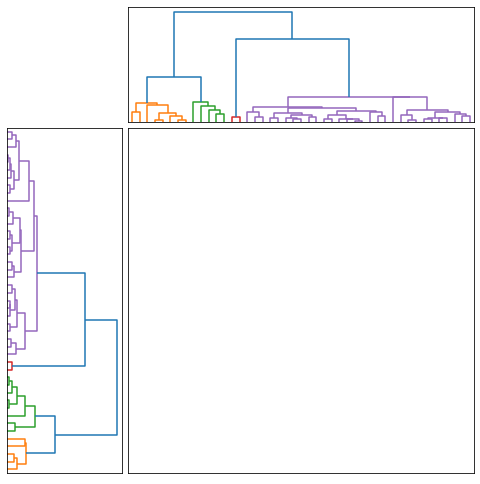

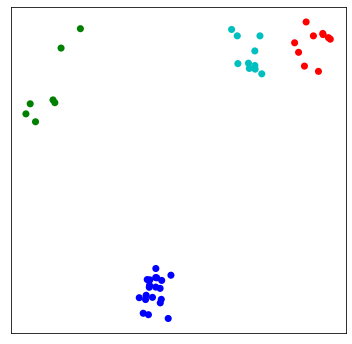

In [280]:
# Creating a cluster of cluster functions
def clusters(number = 20, cnumber = 5, csize = 10):
    # Note that the way clusters are positioned is Gaussian randomness
    rnum = np.random.rand(cnumber, 2)
    rn = rnum[:, 0]*number
    rn = rn.astype(int)
    rn[np.where(rn < 5)] == 5
    rn[np.where(rn > number/2. )] = round(number/2., 0)
    ra = rnum[:,1]*2.9
    ra[np.where(ra < 1.5)] = 1.5
    
    cls = np.random.randn(number, 3) 
    
    # Random multipliers for point of cluster
     
    rxyz = np.random.randn(cnumber-1, 3)
    for i in range(cnumber-1):
        tmp = np.random.randn(rn[i+1], 3)
        x = tmp[:,0] + (rxyz[i,0]*csize)
        y = tmp[:,1] + (rxyz[i,1]*csize)
        z = tmp[:,2] + (rxyz[i,2]*csize)
        tmp = np.column_stack([x, y, z])
        cls = np.vstack([cls, tmp])
    return cls

# Generate a cluster of clusters and distance matrix
cls = clusters()
D = pdist(cls[:,0:2])
D = squareform(D)

# Compute and plot first dendrogram
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
Y1 = hy.linkage(D, method="complete")
cutoff = 0.3*np.max(Y1[:, 2])
Z1 = hy.dendrogram(Y1, orientation="right", color_threshold=cutoff)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

# Compute and plot second dendrogram
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
Y2 = hy.linkage(D, method="average")
cutoff=0.3*np.max(Y2[:, 2])
Z2 = hy.dendrogram(Y2, color_threshold=cutoff)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

# Plot the distance matrix
ax3 = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1 = Z1["leaves"]
idx2 = Z2["leaves"]
D = D[idx1,:]
D = D[idx2,:]
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)

# Here we defne a funciton to collect the coordiantes of each point of different cluster
def group(data, index):
    number = np.unique(index)
    groups = []
    for i in number:
        groups.append(data[index==i])
    return groups

# Creating a cluster fo clusters
cls = clusters()

# Calculating the linkages matrix
Y = hy.linkage(cls[:,0:2], method="complete")

cutoff = 0.3*np.max(Y[:,2])

index = hy.fcluster(Y, cutoff, "distance")

groups = group(cls, index)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
colors = ['r', 'c', 'b', 'g', 'orange', 'k', 'y', 'gray']
for i, g in enumerate(groups):
    i = np.mod(i, len(colors))
    ax.scatter(g[:,0], g[:,1], c=colors[i], edgecolor='none', s=50)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [268]:
a = np.random.rand(5, 2)
a = a[:,0]*20
a = a.astype(int)
a[np.where(a<5)] = 5
a[np.where(a>10/2.)] = round(10/2., 0)
a

array([5, 5, 5, 5, 5])

30.0

In [241]:
np.random.rand

Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `random_sample`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      builtin_function_or_method


### Signal and Image Processing

In [206]:
# Getting the list of files in the directory
files = glob("spac/*") 
files

[]

In [222]:
def retrieve_iss_images(begin, end):
    # begin and end are integers
    # Looping over image range and downloading
    for i in range(begin, end):
        url = 'http://eol.jsc.nasa.gov/sseop/images/ESC/small/ISS030/ISS030-E-'
        url = url + str(i) + '.JPG'
        print('saving ' + str(i) + '.JPG ...')
        try:
            open(str(i) + '.JPG', 'wb').write(urlopen(url).read())
        except Exception as e:
            print(e)
            pass

retrieve_iss_images(55315, 56211)

TTP Error 404: Not Found
saving 55786.JPG ...
HTTP Error 404: Not Found
saving 55787.JPG ...
HTTP Error 404: Not Found
saving 55788.JPG ...
HTTP Error 404: Not Found
saving 55789.JPG ...
HTTP Error 404: Not Found
saving 55790.JPG ...
HTTP Error 404: Not Found
saving 55791.JPG ...
HTTP Error 404: Not Found
saving 55792.JPG ...
HTTP Error 404: Not Found
saving 55793.JPG ...
HTTP Error 404: Not Found
saving 55794.JPG ...
HTTP Error 404: Not Found
saving 55795.JPG ...
HTTP Error 404: Not Found
saving 55796.JPG ...
HTTP Error 404: Not Found
saving 55797.JPG ...
HTTP Error 404: Not Found
saving 55798.JPG ...
HTTP Error 404: Not Found
saving 55799.JPG ...
HTTP Error 404: Not Found
saving 55800.JPG ...
HTTP Error 404: Not Found
saving 55801.JPG ...
HTTP Error 404: Not Found
saving 55802.JPG ...
HTTP Error 404: Not Found
saving 55803.JPG ...
HTTP Error 404: Not Found
saving 55804.JPG ...
HTTP Error 404: Not Found
saving 55805.JPG ...
HTTP Error 404: Not Found
saving 55806.JPG ...
HTTP Error 404

### Sparse Matrices

Python can operate with matrices of the size $10^3$ comfortably

In [200]:
N = 300

# Craeting a random sparse matrix
sparceMatrix = scipy.sparse.rand(N, N)

# Creating an array clone of it
anArray = sparceMatrix.toarray()

print("NumPy array data size: " + str(anArray.nbytes) + " bytes")
print("The sparse matrix data size: " + str(sparceMatrix.data.nbytes) + " bytes")

# Non-sparse
timeZero = time.time()
residualOne = eigh(anArray)
print("Non-sparse opertion takes: " + str(np.round(time.time()-timeZero, 3)) + " seconds")

# Sparse 
timeZero = time.time()
residualTwo = eigsh(sparceMatrix)
print("Sarse opertion takes: " + str(np.round(time.time()-timeZero, 3)) + " seconds")

NumPy array data size: 720000 bytes
The sparse matrix data size: 7200 bytes
Non-sparse opertion takes: 0.026 seconds
Sarse opertion takes: 0.013 seconds


## Chapter Four: SciKit: Taking SciPy One Step Further
SciKit-Image is a more beefed up image module than scipy.ndimage, and it is made to be imaging processing toolkit for SciPy. SciKit-Learn is a machine learning packag that can be used sot a range of scientific and engineering purposes.



### SciKit-Image

SciPy's ndimage contains tools for processing multidimensional data including basic filtering,  Fourier Trnasform, morphology, interpolation, and measurements. Advanced adn high level modules include color space conversion, image intensity adjustment algorithms, feature detections, filters for sharpening and denoising. 

#### Dynamic Threshold

Thresholding is segmenting image componenets from one another. Adaptive Thresholding techniques are availabel in scikit-image. 

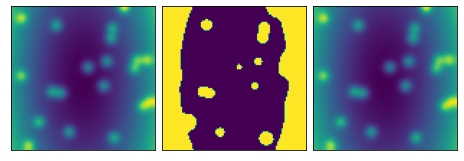

In [103]:
# Generating data points with a non-uniform backgroud
x = np.random.uniform(low=0, high=100, size=20).astype("i4")
y = np.random.uniform(low=0, high=100, size=20).astype("i4")

#  Creating image with non-uniform backgroud
func = lambda x, y: x**2 + y**2
grid_x, grid_y = np.mgrid[-1:1:100j, -2:2:100j]
bkg = func(grid_x, grid_y)
bkg = bkg/np.max(bkg)

# Creating points
clean = np.zeros((100, 100))
clean[(x, y)] += 5
clean = ndimage.gaussian_filter(clean, 3)
clean = clean/np.max(clean)

# Combining the non uniform backgroud and the points
fimg = bkg+clean
fimg = fimg/np.max(fimg)

# Defifining minimum neighbour size of an object
block_size = 3

# Adaptive threshold function which returns image map of structures that are different to backgroud
adaptive_cut = skif.threshold_local(fimg, block_size, offset=0)

# Global threshold
global_thresh = skif.threshold_otsu(fimg)
global_cut = fimg > global_thresh

# Creating figure to highlight difference between adaptive and global threshold
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

ax1 = fig.add_subplot(131)
ax1.imshow(fimg)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

ax1 = fig.add_subplot(132)
ax1.imshow(global_cut)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

ax1 = fig.add_subplot(133)
ax1.imshow(adaptive_cut)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

#### Local Maxima

We can identify points on a onn uniform backgroud to obtain ther pixels coordntes using __skimage.morphology.is_local_maxmum__

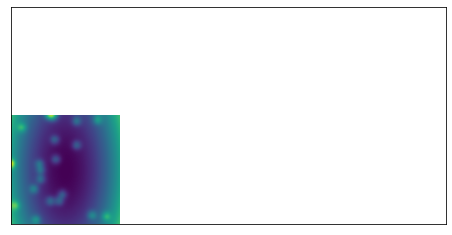

In [113]:
# Generating data points with a non-uniform backgroud
x = np.random.uniform(low=0, high=100, size=20).astype("i4")
y = np.random.uniform(low=0, high=100, size=20).astype("i4")

#$ Creating image with non-uniform background
func = lambda x, y: np.cos(x) + np.sin(y)
grid_x, grid_y = np.mgrid[0:12:200j, 0:24:400j]
bkf = func(grid_x, grid_y)
bkg = bkg/np.max(bkg)

# Creating points

# Creating points
clean = np.zeros((100, 100))
clean[(x, y)] += 5
clean = ndimage.gaussian_filter(clean, 3)
clean = clean/np.max(clean)


# Combining the non uniform backgroud and the points
fimg = bkg+clean
fimg = fimg/np.max(fimg)

# Calculating local maxma
lm1 = morph.local_maxima(fimg)
x1, y1 = np.where(lm1.T == True)

# Creating figure to show local minimum detection rate succes
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(111)
ax.imshow(fimg)
ax.set_xlim(0, 400)
ax.set_ylim(0, 200)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#### Scikit-Learn

It contains an easy to use machine learning bundle that contains a collection of toosl associates with sueprvised and unsupervised machine learning.

##### Linear Regression

Scikit-Learn provides support for Lasso and Ridge Regression

In [36]:
y

array([  -6.93224214,   -4.12640648,   29.47265153,  -12.03166314,
       -121.67258636, -149.24989393,  113.53496654,   -7.83638906,
        190.00097568,   49.48805247, -212.99678156,    2.18830846,
         64.26467148,   49.95787486,   91.27348051,  119.81223558,
        -20.7036038 ,  124.12659308,   83.48604481, -159.09767894,
        -28.38391171,  210.54089741,  -65.6362408 ,  -95.80728258,
       -133.39413114,  -43.00186876,  -86.54309532,  -85.84022596,
        -56.95028105,  -40.17616673,  -21.15743383, -152.72816927,
        -73.14427934,   85.99017661,   18.91233157,  -44.89873792,
         81.90208391,   97.15132452,   -9.61871875,  195.52714389,
        -10.4891272 ,  -56.08013836,   65.1732454 ,   80.96234141,
         90.02064653,  -15.21544918, -128.73046505,   49.36304394,
        -36.63682396,  128.31929799,  -68.10313731,  -62.21980777,
       -127.29590913, -136.59042386,   59.54136549,   54.14645648,
        -31.94436796,   90.40709597,   59.04981282,   17.73993

In [57]:
X_test

array([-0.57884966, -0.87079715])

The model coefficinets are: {:.2f} [-10.25691752  90.5463984 ]
Pridiction using a random value of X is: 
The regression score on test data is: 


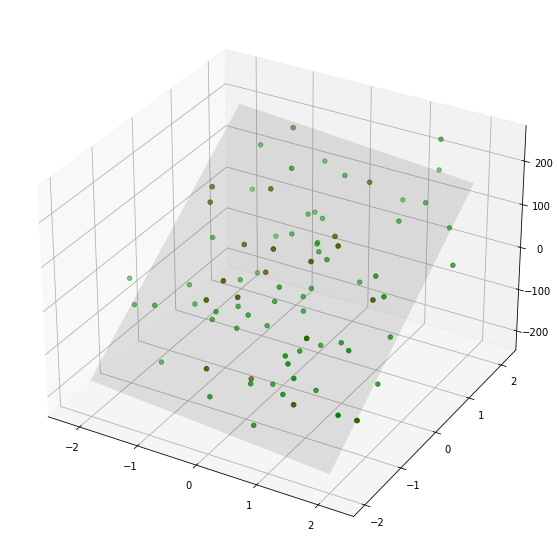

In [86]:
# Generating synthetic data for training and testing
X, y = make_regression(n_samples=100
                       , n_features=2
                       , n_informative=1
                       , random_state=0
                       , noise=50)
# X and y are the values for 3D space . We first need  to train the machine 
# Data is split into trianing and testing sets
X_train, X_test = X[:80], X[:20]
y_train, y_test = y[:80], y[:20]

# Creating instance of a model
regr = linear_model.LinearRegression()

# Training the model
regr.fit(X_train, y_train)

# Print the coefficeints
print("The model coefficinets are: {:.2f}",format(regr.coef_))

# Predicting y-value based training
X1 = np.array([1.2, 4]).reshape(1, 2)
print("Pridiction using a random value of X is: ".format(regr.predict(X1)))

# Let' see how well the model matches up
print("The regression score on test data is: ".format(regr.score(X_test, y_test)))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
# ax Axes3D(fig)

# data
ax.scatter(X_train[:,0], X_train[:,1], y_train, facecolor="g")
ax.scatter(X_test[:,0], X_test[:,1], y_test, facecolor="r")

# Function with coefficient varible
line = lambda x1, x2: regr.coef_[0]*x1 + regr.coef_[1]*x2

grid_x1, grid_x2 = np.mgrid[-2:2:10j, -2:2:10j]
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2), alpha=0.1, color="k")
ax.yaxis.set_visible(False)
ax.zaxis.set_visible(False)
plt.show()

#### Clustering

SciPy has two packages for Clustering analysis with vector quantization and hierarchy. SciKit-Learn goes beayod these. 

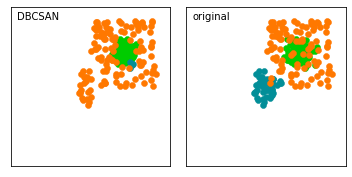

In [144]:
# Creating data
c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(50, 2)

# Creating a uniformly distributed backgroud
u1 = np.random.uniform(low=0, high = 10, size=100)
u2 = np.random.uniform(low=0, high=10, size=100)
c3 = np.column_stack([u1, u2])

# Pooling all the data into one 150X2 array
data = np.vstack([c1, c2, c3])

# Calculating the cluster with DBSCAN funciton
db = DBSCAN().fit(data)
labels = db.labels_
np.unique(labels)

dbc1 = data[labels == 0]
dbc2 = data[labels == 1]
noise = data[labels == -1]

x1, x2 = -12, 12
y1, y2 = -12, 12

fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(121, aspect="equal")
ax1.scatter(dbc1[:,0], dbc1[:,1], lw=0.5, color="#00CC00")
ax1.scatter(dbc2[:,0], dbc2[:,1], lw=0.5, color="#028E98")
ax1.scatter(dbc1[:,0], dbc1[:,1], lw=0.5, color="#00CC00")
ax1.scatter(dbc2[:,0], dbc2[:,1], lw=0.5, color="#028E98")
ax1.scatter(noise[:,0], noise[:,1], lw=0.5, color="#FF7800")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_xlim(x1, x2)
ax1.set_ylim(y1, y2)
ax1.text(-11, 10, "DBCSAN")

ax2 = fig.add_subplot(122, aspect="equal")
ax2.scatter(c1[:,0], c1[:,1], lw=0.5, color="#00CC00")
ax2.scatter(c2[:,0], c2[:,1], lw=0.5, color="#028E98")
ax2.scatter(c3[:,0], c3[:,1], lw=0.5, color="#FF7800")
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.text(-11, 10, "original")
plt.show()

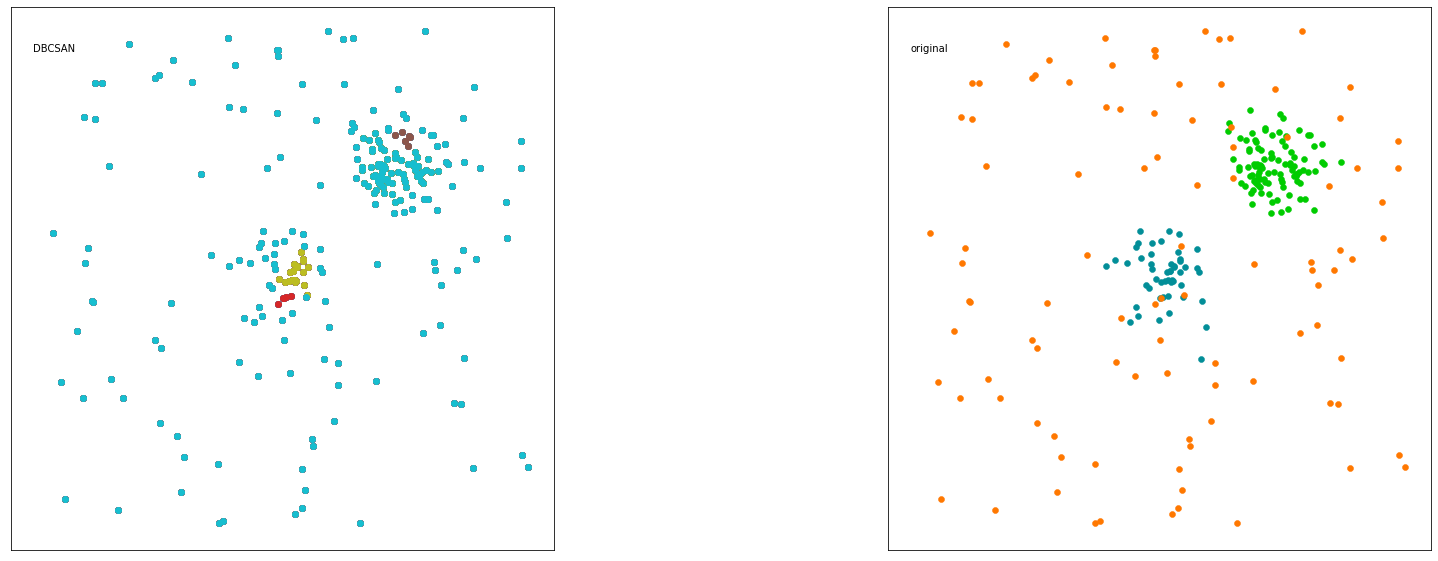

In [151]:

# Creating data
c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(50, 2)

# Creating a uniformly distributed backgroud
u1 = np.random.uniform(low=-11, high = 11, size=100)
u2 = np.random.uniform(low=-11, high=11, size=100)
c3 = np.column_stack([u1, u2])

# Pooling all the data into one 150X2 array
data = np.vstack([c1, c2, c3])

# Calculating the cluster with DBSCAN funciton
db = DBSCAN().fit(data)
labels = db.labels_
np.unique(labels)

dbc1 = data[labels == 0]
dbc2 = data[labels == 1]
noise = data[labels == -1]

x1, x2 = -12, 12
y1, y2 = -12, 12

fig = plt.figure(figsize=(30, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Question: how do we synchronize colors in the two subplots

ax1 = fig.add_subplot(121, aspect="equal")
for label in db.labels_:
    ax1.scatter(data[labels == label][:,0], data[labels == label][:,1])
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_xlim(x1, x2)
ax1.set_ylim(y1, y2)
ax1.text(-11, 10, "DBCSAN")

ax2 = fig.add_subplot(122, aspect="equal")
ax2.scatter(c1[:,0], c1[:,1], lw=0.5, color="#00CC00")
ax2.scatter(c2[:,0], c2[:,1], lw=0.5, color="#028E98")
ax2.scatter(c3[:,0], c3[:,1], lw=0.5, color="#FF7800")
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.text(-11, 10, "original")
plt.show()

array([-1,  0,  1,  2,  3])

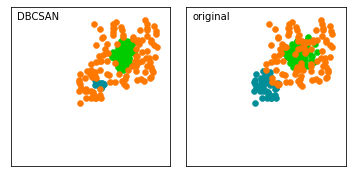